<img src="https://i.stack.imgur.com/g1phN.png">

In [1]:
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt
from scipy.stats import kurtosis, skew
import time
import scipy
import sklearn
import warnings
from sklearn import preprocessing


In [2]:

def calculate_landmark_lda(X, y):
    import sklearn.discriminant_analysis
    if len(y.shape) == 1 or y.shape[1] == 1:
        kf = sklearn.model_selection.KFold(n_splits=10)
    else:
        kf = sklearn.model_selection.KFold(n_splits=10)

    accuracy = 0.
    result=kf.split(X, y) 
    
    try:
        for train,test in kf.split(X,y):   
   
            lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

            if len(y.shape) == 1 or y.shape[1] == 1:
                lda.fit(X.iloc[train], y[train])
            else:
                lda = OneVsRestClassifier(lda)
                lda.fit(X.iloc[train], y[train])

            predictions = lda.predict(X.iloc[test])
            accuracy += sklearn.metrics.accuracy_score(predictions, y[test])
        return accuracy / 10
    except scipy.linalg.LinAlgError as e:
        print("LDA failed: %s Returned 0 instead!" % e)
        return np.NaN
    except ValueError as e:
        print("LDA failed: %s Returned 0 instead!" % e)
        return np.NaN



def calculate_landmark_nb(X, y):
    import sklearn.naive_bayes

    if len(y.shape) == 1 or y.shape[1] == 1:
        kf = sklearn.model_selection.KFold(n_splits=10)
    else:
        kf = sklearn.model_selection.KFold(n_splits=10)

    accuracy = 0.
    for train, test in kf.split(X, y):
        nb = sklearn.naive_bayes.GaussianNB()

        if len(y.shape) == 1 or y.shape[1] == 1:
            nb.fit(X.iloc[train], y[train])
        else:
            nb = OneVsRestClassifier(nb)
            nb.fit(X.iloc[train], y[train])

        predictions = nb.predict(X.iloc[test])
        accuracy += sklearn.metrics.accuracy_score(predictions, y[test])
    return accuracy / 10




def calculate_landmark_dt(X, y):
    import sklearn.tree

    if len(y.shape) == 1 or y.shape[1] == 1:
        kf = sklearn.model_selection.KFold(n_splits=10)
    else:
        kf = sklearn.model_selection.KFold(n_splits=10)

    accuracy = 0.
    for train, test in kf.split(X, y):
        random_state = sklearn.utils.check_random_state(42)
        tree = sklearn.tree.DecisionTreeClassifier(random_state=random_state)

        if len(y.shape) == 1 or y.shape[1] == 1:
            tree.fit(X.iloc[train], y[train])
        else:
            tree = OneVsRestClassifier(tree)
            tree.fit(X.iloc[train], y[train])

        predictions = tree.predict(X.iloc[test])
        accuracy += sklearn.metrics.accuracy_score(predictions, y[test])
    return accuracy / 10


def calculate_landmark_dnl(X, y):
        import sklearn.tree

        if len(y.shape) == 1 or y.shape[1] == 1:
            kf = sklearn.model_selection.KFold(n_splits=10)
        else:
            kf = sklearn.model_selection.KFold(n_splits=10)

        accuracy = 0.
        for train, test in kf.split(X, y):
            random_state = sklearn.utils.check_random_state(42)
            node = sklearn.tree.DecisionTreeClassifier(
                criterion="entropy", max_depth=1, random_state=random_state,
                min_samples_split=2, min_samples_leaf=1,  max_features=None)
            if len(y.shape) == 1 or y.shape[1] == 1:
                node.fit(X.iloc[train], y[train])
            else:
                node = OneVsRestClassifier(node)
                node.fit(X.iloc[train], y[train])
            predictions = node.predict(X.iloc[test])
            accuracy += sklearn.metrics.accuracy_score(predictions, y[test])
        return accuracy / 10

    

def calculate_landmark_rnl(X, y):
    import sklearn.tree

    if len(y.shape) == 1 or y.shape[1] == 1:
        kf = sklearn.model_selection.KFold(n_splits=10)
    else:
        kf = sklearn.model_selection.KFold(n_splits=10)
    accuracy = 0.

    for train, test in kf.split(X, y):
        random_state = sklearn.utils.check_random_state(42)
        node = sklearn.tree.DecisionTreeClassifier(criterion="entropy",max_depth=1,\
        random_state=random_state, min_samples_split=2, min_samples_leaf=1, max_features=1)
        node.fit(X.iloc[train], y[train])
        predictions = node.predict(X.iloc[test])
        accuracy += sklearn.metrics.accuracy_score(predictions, y[test])
    return accuracy / 10



def calculate_landmark_k1nn(X, y):
    import sklearn.neighbors

    if len(y.shape) == 1 or y.shape[1] == 1:
        kf = sklearn.model_selection.KFold(n_splits=10)
    else:
        kf = sklearn.model_selection.KFold(n_splits=10)

    accuracy = 0.
    for train, test in kf.split(X, y):
        kNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
        if len(y.shape) == 1 or y.shape[1] == 1:
            kNN.fit(X.iloc[train], y[train])
        else:
            kNN = OneVsRestClassifier(kNN)
            kNN.fit(X.iloc[train], y[train])
        predictions = kNN.predict(X.iloc[test])
        accuracy += sklearn.metrics.accuracy_score(predictions,y[test])
    return accuracy / 10



### Not a meta feature just an object
def calculate_pca(X, y):
    import sklearn.decomposition
    pca = sklearn.decomposition.PCA(copy=True)
    rs = np.random.RandomState(42)
    indices = np.arange(X.shape[0])
    for i in range(10):
        try:
            rs.shuffle(indices)
            pca.fit(X.iloc[indices])
            return pca
        except LinAlgError as e:
            pass
    print("Failed to compute a Principle Component Analysis")
    return None


def calculate_PCAFractionOfComponentsFor95PercentVariance(X, y, pca):

    if pca is None:
        return np.NaN
    sum_ = 0.
    idx = 0
    while sum_ < 0.95 and idx < len(pca.explained_variance_ratio_):
        sum_ += pca.explained_variance_ratio_[idx]
        idx += 1
    return float(idx)/float(X.shape[1])


def calculate_PCAKurtosisFirstPC(X, y, pca):
    if pca is None:
        return np.NaN
    components = pca.components_
    pca.components_ = components[:1]
    transformed = pca.transform(X)
    pca.components_ = components

    kurtosis = scipy.stats.kurtosis(transformed)
    return kurtosis[0]

def calculate_PCASkewnessFirstPC(X, y, pca):
    if pca is None:
        return np.NaN
    components = pca.components_
    pca.components_ = components[:1]
    transformed = pca.transform(X)
    pca.components_ = components

    skewness = scipy.stats.skew(transformed)
    return skewness[0]


In [3]:
meta_features_names=["nr_instances", "log_nr_instances", "nr_features",\
    "log_nr_features", "nr_classes", "nr_numerical_features", "nr_categorical_features", \
    "ratio_num_cat", "class_entropy", "missing_val", "ratio_missing_val", "max_prob", \
    "min_prob", "mean_prob","std_dev", "dataset_ratio", "symbols_sum", "symbols_mean", \
    "symbols_std_dev", "skew_min", "skew_max", "skew_mean", "skew_std_dev", "kurtosis_min",\
    "kurtosis_max", "kurtosis_mean", "kurtosis_std_dev"]
                     #"landmark_lda", "landmark_nb","landmark_dt",\
    #"landmark_dnl","landmark_rnl", "landmark_k1nn", "landmark_PCAFractionOfComponentsFor95PercentVariance",\
    #"landmark_PCAKurtosisFirstPC", "landmark_PCASkewnessFirstPC"]

def  extractMetaFeatures(dataset, file, classCol = None):
    
    
    
    t0 = time.time()
    
    #### 5. Number of Classes - DONE
    if classCol == None:
        target_variable_Index = dataset.shape[1] - 1
    else:
         target_variable_Index = dataset.columns.get_loc(classCol)
        
    target_variable = dataset.iloc[:, target_variable_Index]
    dataset.drop(dataset.columns[target_variable_Index], axis=1, inplace = True)
    
    nr_classes = target_variable.nunique()
    print(nr_classes)
    t1 = time.time()
    #print('1. Time spend:', t1 - t0)
    #### Remove Missing Values
    dataset.replace(to_replace = ["? ","?", " ?" "-" " -","- ", " - ", "#", " #", "# "," # ", " "], value = np.NAN, inplace = True)
    dataset.dropna(axis = 1, how = 'all', inplace = True) # Drop Column if all of its values are missing

    #### Remove ID columns or columns with always the same value
    for col in dataset.columns:
        feature = dataset[col].dropna()
        numSyms = feature.nunique()
        if col == 'id' or col == 'ID' or numSyms == 1 or (numSyms == dataset.shape[0] and feature.dtype != np.number):
            dataset.drop(col, axis = 1, inplace = True)
    
    t0 = time.time()
    #print('Preprocessing Time spent:', t0 - t1)
    
    ### 1.Number of Instances - DONE
    nr_instances = dataset.shape[0]
    t1 = time.time()
    #print('1. Time spend:', t1 - t0)
    
    ### 2.Log number of Instances - DONE
    log_nr_instances = np.log(nr_instances)
    t2 = time.time()
    #print('2. Time spend:', t2 - t1)
    
    #### 3.Number of Features - DONE
    nr_features = dataset.shape[1]
    t3 = time.time()
    #print('3. Time spend:', t3 - t2)
    
    ### 4.Log Number of Features - DONE
    log_nr_features = np.log(nr_features)
    t4 = time.time()
    #print('4. Time spend:', t4 - t3)
    

    ### 6. Number of Missing Values
    ### 7. Ratio of Missing Values - DONE
    missing_val = 0
    missing_val = dataset.isnull().sum().sum() + dataset.isna().sum().sum()
    
    ratio_missing_val = missing_val / dataset.size
    t7 = time.time()
    #print('7. Time spend:', t7 - t6)
    
    ### 8. Number of Numerical Features - DONE
    ### 9. Number of Categorical Features - DONE
    numerical = []
    categorical = dataset.select_dtypes(exclude=['number']).columns.values.tolist()
    for col in dataset.columns:
        if col not in categorical:
            feature = dataset[col].dropna()
            numSyms = feature.nunique()
            if numSyms < log_nr_instances: #it should be considered as categorical if number of unique values < log number of instances
                categorical.append(col)
            else:
                numerical.append(col)
    
    nr_numerical_features = len(numerical)
    nr_categorical_features = len(categorical)
    
    t9 = time.time()
    #print('9. Time spend:', t9 - t7)
                
    ### 10. Ratio of Categorical to Numerical Features - DONE
    if(nr_numerical_features > 0):
        ratio_num_cat = nr_categorical_features / nr_numerical_features
    else:
        ratio_num_cat = 9999999999
    t10 = time.time()
    #print('10. Time spend:', t10 - t9)
    
    ### 11. Class Entropy - DONE
    prob_classes = []
    class_entropy = 0
    classes = target_variable.unique()
    
    for value in classes:
        prob = (sum(target_variable==value) / len(target_variable))
        
        prob_classes.append(prob)
        class_entropy = class_entropy - prob * np.log2(prob)
        
    ### 12. Maximum Class probability - DONE
    max_prob = max(prob_classes)
    
    ### 13. Minimum Class probability - DONE
    min_prob = min(prob_classes)
    
    ### 14. Mean Class probability - DONE
    mean_prob = np.mean(prob_classes)
    
    ### 15. Standard Deviation of Class probability - DONE
    std_dev = np.std(prob_classes)
    
    ### 16. Dataset Ratio - DONE
    dataset_ratio = nr_features / nr_instances
    
    t11 = time.time()
    #print('11. Time spend:', t11 - t10)
    
    ### Categorical Features Statistics
    symbols=[]
    if len(categorical) != 0:
        for col in categorical:
            feature = dataset[col].dropna()
            symbols.append(feature.nunique())
    
    ### 17. Symbols Sum - DONE
        symbols_sum = sum(symbols)
        
    ### 18. Symbols Mean - DONE
        symbols_mean = np.mean(symbols)

    ### 19. Symbols Standard Deviation - DONE
        symbols_std_dev = np.std(symbols)
        
    else:
        symbols_sum = 0
        symbols_mean = 0
        symbols_std_dev = 0
    
    t12 = time.time()
    #print('12. Time spend:', t12 - t11)
    
    ### Numerical Features Statistics
    skewness_values = np.zeros(len(numerical))
    kurtosis_values = np.zeros(len(numerical))
    
    #print(dataset)
    if len(numerical) != 0:
        for coli in range(len(numerical)):
            #print(numerical[coli])
            feature = dataset[numerical[coli]].dropna()
            #print('feat-AFTER:', feature)
            skewness = skew(feature)
            kurt = kurtosis(feature)
            skewness_values[coli] = skewness
            kurtosis_values[coli] = kurt
    
    ### 20. Skewness Minimum - DONE
        skew_min = min(skewness_values)

    ### 21. Skewness Maximum - DONE
        skew_max = max(skewness_values)

    ### 22. Skewness Mean - DONE
        skew_mean = np.mean(skewness_values)

    ### 23. Skewness Standard deviation - DONE
        skew_std_dev = np.std(skewness_values)

    ### 24. Kurtosis Minimum - DONE
        kurtosis_min = min(kurtosis_values)

    ### 25. Kurtosis Maximum - DONE
        kurtosis_max = max(kurtosis_values)

    ### 26. Kurtosis Mean - DONE
        kurtosis_mean = np.mean(kurtosis_values)

    ### 27. Kurtosis Standard Deviation - DONE
        kurtosis_std_dev = np.std(kurtosis_values)
    else:
        skew_min = 0
        skew_max = 0
        skew_mean = 0
        skew_std_dev = 0
        kurtosis_min = 0
        kurtosis_max = 0
        kurtosis_mean = 0
        kurtosis_std_dev = 0
    
    #t13 = time.time()
    #print('13. Time spend:', t13 - t12)    
    
    #class_col=dataset.iloc[:,-1]
    #dataset=pd.get_dummies(dataset.iloc[:,:-1])
    #dataset["class"]=class_col
    
        
    y=target_variable
    print(y.nunique())
    
    X = dataset
    X = pd.get_dummies(X)
    
    le = preprocessing.LabelEncoder()
    y=le.fit_transform(y.astype(str))
    #landmark_lda = calculate_landmark_lda(X,y)
   # landmark_nb = calculate_landmark_nb(X,y)
    #landmark_dt = calculate_landmark_dt(X,y)
    #landmark_dnl = calculate_landmark_dnl(X,y)
    #landmark_rnl = calculate_landmark_rnl(X,y)
    #landmark_k1nn = calculate_landmark_k1nn(X,y)
    
    #pca=calculate_pca(X,y)
    #landmark_PCA95PercentVariance = calculate_PCAFractionOfComponentsFor95PercentVariance(X,y,pca)
    #landmark_PCAKurtosisFirstPC = calculate_PCAKurtosisFirstPC(X,y,pca)
    #landmark_PCASkewnessFirstPC = calculate_PCASkewnessFirstPC(X,y,pca)
    
    
    meta_features=np.array([file, nr_instances,log_nr_instances,nr_features,\
    log_nr_features,nr_classes,nr_numerical_features,nr_categorical_features,ratio_num_cat,\
    class_entropy, missing_val, ratio_missing_val,max_prob,min_prob, mean_prob,\
    std_dev,dataset_ratio,symbols_sum,symbols_mean,symbols_std_dev,\
    skew_min,skew_max,skew_mean,skew_std_dev,kurtosis_min,kurtosis_max,kurtosis_mean,kurtosis_std_dev])
    #landmark_lda,landmark_nb,landmark_dt,landmark_dnl,landmark_rnl,landmark_k1nn,
    #landmark_PCA95PercentVariance, landmark_PCAKurtosisFirstPC,landmark_PCASkewnessFirstPC])
    
    
    return  meta_features

In [6]:
file="server/uploads/blood.csv"
dataset = pd.read_csv(file, index_col=None, header=0)
new_meta = extractMetaFeatures(dataset, file)

2
2


In [8]:
new_meta

array(['server/uploads/blood.csv', '748', '6.617402977974478', '4',
       '1.3862943611198906', '2', '4', '0', '0.0', '0.7916446298452327',
       '0', '0.0', '0.7620320855614974', '0.23796791443850268', '0.5',
       '0.2620320855614974', '0.0053475935828877', '0', '0', '0',
       '0.7479465443244487', '3.2048221801543617', '2.2585703379392172',
       '1.026961731837591', '-0.2520030108444278', '15.76221572558892',
       '10.148276743801551', '6.555214709542027'], dtype='<U24')

In [6]:
meta_data=[]
path ='/home/salijona/AutoMLMetaLearn/Datasets_all' 
allFiles = glob.glob(path + "/*.csv")
counter = 0

columns=["file_name","nr_instances", "log_nr_instances", "nr_features",\
    "log_nr_features", "nr_classes", "nr_numerical_features", "nr_categorical_features", \
    "ratio_num_cat", "class_entropy", "missing_val", "ratio_missing_val", "max_prob", \
    "min_prob", "mean_prob","std_dev", "dataset_ratio", "symbols_sum", "symbols_mean", \
    "symbols_std_dev", "skew_min", "skew_max", "skew_mean", "skew_std_dev", "kurtosis_min",\
    "kurtosis_max", "kurtosis_mean", "kurtosis_std_dev"]
    #"landmark_lda", "landmark_nb","landmark_dt",\
    #"landmark_dnl","landmark_rnl", "landmark_k1nn", "landmark_PCAFractionOfComponentsFor95PercentVariance",\
    #"landmark_PCAKurtosisFirstPC", "landmark_PCASkewnessFirstPC" ]

meta=pd.DataFrame(columns=columns)
meta.to_csv("MetaData_test.csv",index=False, columns=columns)

for file in allFiles:
    #counter += 1
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\n', file)

    dataset = pd.read_csv(file, index_col=None, header=0)
    new_meta = extractMetaFeatures(dataset, file)
    new_meta=pd.DataFrame([new_meta], columns=columns)

    new_meta.to_csv("MetaData_test.csv", mode="a", header=False, index=False, columns=columns)

#warnings.filter("ignore")




#print(meta_data)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
 /home/salijona/AutoMLMetaLearn/Datasets_all/mozilla4.csv
2
2000
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
 /home/salijona/AutoMLMetaLearn/Datasets_all/phpuZu33P.csv
2
2


In [4]:
ls

Complete_Merged.csv           Untitled2.ipynb  digits_c.np.npy  reg.py
Meta-featuresSelection.ipynb  Untitled3.ipynb  digits_x.np.npy  server/
MetaData_test.csv             auto-sklearn/    digits_y.np.npy  test.py
SMAC3/                        autosk/          george/          test_serv/
Untitled.ipynb                boston.npy       hypersk/         tmg/
Untitled1.ipynb               data/            outp/            tmp/


In [3]:
meta_data=pd.read_csv("MetaData.csv", header=0,index_col=None)
meta_data=meta_data.drop(meta_data.columns[0], axis=1)

meta_data=np.array(meta_data)


In [4]:
copyMeta = meta_data.copy()

##### Function to remove outliers

In [5]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

#### Histogram Plotting

In [7]:
meta_features_names=["nr_instances", "log_nr_instances", "nr_features",\
    "log_nr_features", "nr_classes", "nr_numerical_features", "nr_categorical_features", \
    "ratio_num_cat", "class_entropy", "missing_val", "ratio_missing_val", "max_prob", \
    "min_prob", "mean_prob", "std_dev", "dataset_ratio", "symbols_sum", "symbols_mean", \
    "symbols_std_dev", "skew_min", "skew_max", "skew_mean", "skew_std_dev", "kurtosis_min",\
    "kurtosis_max", "kurtosis_mean", "kurtosis_std_dev"]

In [9]:
print(meta_features_names[0])

nr_instances


<class 'numpy.ndarray'>
Meta-Data Shape: (200, 3)
Length of Meta Features Names: 3


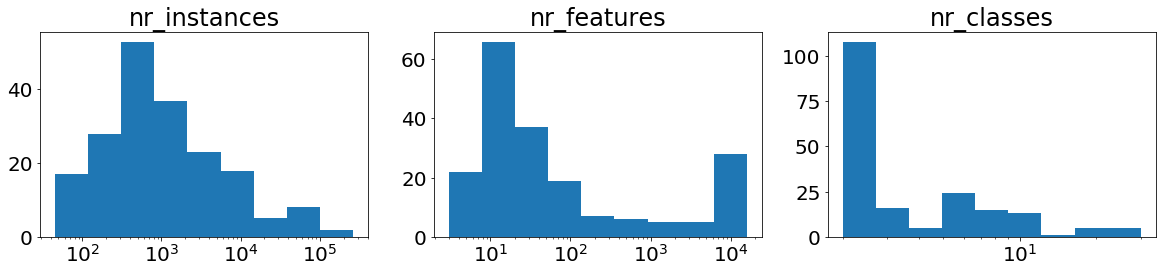

In [29]:
#plt.rcParams.update({'font.size': 500})

meta_data = copyMeta.copy()
print(type(meta_data))
def histogram(meta_data,meta_features_names):
    plt.rcParams.update({'font.size': 20})
    plt.rcParams['figure.figsize'] = (20, 40)
    j=0
    print("Meta-Data Shape:", meta_data.shape)
    print("Length of Meta Features Names:", len(meta_features_names))
    for i in meta_data.T:
        text = meta_features_names[j]
        #if j == 1 or j == 3:
            #j += 1
            #continue
            
        ax = plt.subplot(9,3,1+j)
        plt.xscale("log")

        plt.title('{}'.format(text))
        
        i = reject_outliers(i, 2)
        mini = min(i)
        maxi = max(i)    
        
        if mini <=  0:
            i -= (mini-1)
        
        #print('feature processing now: ', text, ' --- mini:', mini, ' --- maxi:', maxi, '===i===', j)
        plt.hist(i, bins = np.logspace(np.log10(min(i)), np.log10(max(i)), 10))

        j=j+1
    plt.savefig("All-Datasets-1.png")
    plt.show()
b = [0,2,4]
#b=[5,15,18]
#b=[19,20,22]
#b=[23,25,12]
c = [ meta_features_names[i] for i in b]
histogram(meta_data[:,b],c)

#### Heat Map Plotting

In [35]:
binary=np.sum(meta_data[:,4]==2)
print(binary/200)

0.54


In [ ]:
plt.rcParams['figure.figsize'] = (100, 40)
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots()
im = ax.imshow(meta_data.T)

dataset_info=np.arange(1, 20, 1, dtype=int)

# We want to show all ticks...
ax.set_xticks(np.arange(len(dataset_info)))
ax.set_yticks(np.arange(len(meta_features_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(dataset_info)
ax.set_yticklabels(meta_features_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(meta_features_names)):
    for j in range(len(dataset_info)):
        text = ax.text(j, i, int(meta_data[j, i]), ha="center", va="center", color="w")

ax.set_title("")
#fig.tight_layout()
plt.savefig("heatmap.png")
plt.show()